# Decision Tree
- Supeervised ML
- Moslty used in classification
- Both categorical and continuous input/output variables

# Install
pip install pydotplus

# Install
pip install graphviz

In [1]:
import   pandas as pd
import   numpy as np
import   matplotlib.pyplot as plt
from     matplotlib import rcParams
import   seaborn as sns
from io  import StringIO
from     IPython.display import Image
import   pydotplus
%matplotlib inline

In [2]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.tree            import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, confusion_matrix, plot_roc_curve,\
                             classification_report, roc_auc_score, roc_curve, precision_score

from sklearn.datasets import load_iris

In [43]:
from sklearn import datasets

### Toy Dataset Play

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
toy = pd.read_excel('C:\Basu\Data Science\Decision Tree - Play.xlsx')

In [46]:
toy

,outlook,humidity,windy,play
0,sunny,high,False,no
1,sunny,normal,True,yes
2,overcast,high,False,yes
3,rainy,normal,False,yes
4,rainy,normal,True,no


### Label Encoding

In [47]:
enc = LabelEncoder()
toy['outlook']  = enc.fit_transform(toy['outlook'])
toy['humidity'] = enc.fit_transform(toy['humidity'])
toy['windy']    = enc.fit_transform(toy['windy'])
toy['play']     = enc.fit_transform(toy['play'])

In [48]:
toy

,outlook,humidity,windy,play
0,2,0,0,0
1,2,1,1,1
2,0,0,0,1
3,1,1,0,1
4,1,1,1,0


In [49]:
X = toy.iloc[:,0:3]
y = toy.play

In [50]:
model_play = DecisionTreeClassifier(criterion='gini', max_depth=4)  # (max_depth=3), gini
model_play.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [51]:
model_play.classes_

array([0, 1])

In [52]:
model_play.feature_importances_

array([0.58333333, 0.27777778, 0.13888889])

In [53]:
feature_importance = pd.DataFrame( {'Feature' : X.columns, 'Importance' : model_play.feature_importances_})
feature_importance 

,Feature,Importance
0,outlook,0.583333
1,humidity,0.277778
2,windy,0.138889


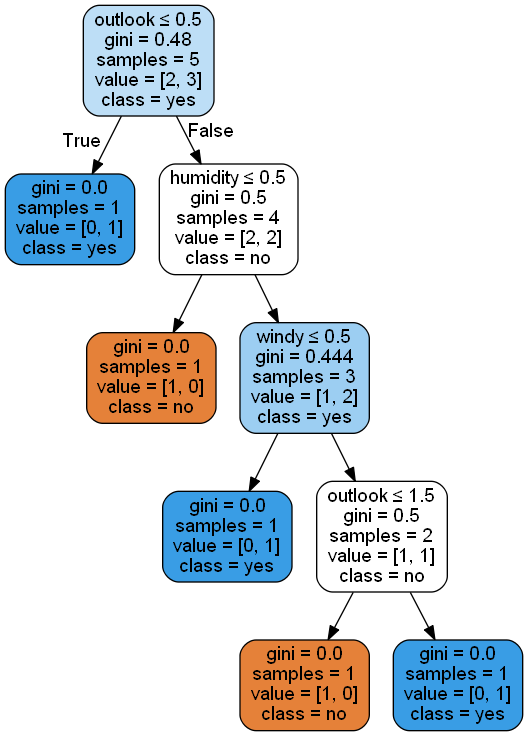

In [54]:
# Visualizing
dot_data = StringIO()
export_graphviz(model_play,out_file=dot_data,
                filled = True,
                feature_names=X.columns,
                class_names=['no','yes'],
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Iris Flowers

In [57]:
iris = load_iris()

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [59]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [60]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [61]:
data['target'] = iris['target']

### Check missing values

In [62]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Check for dupplicate records

In [63]:
data.duplicated().sum()

1

In [68]:
data[data.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [64]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [69]:
data.drop_duplicates(inplace=True)

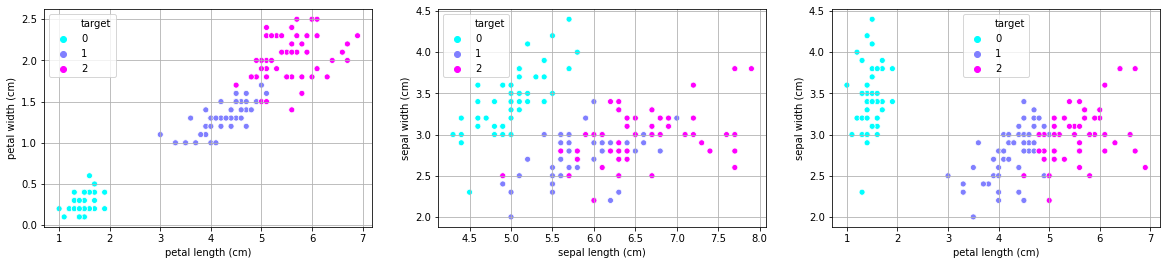

In [70]:
rcParams['figure.figsize'] = [20,4]
plt.subplot(131)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', palette='cool',  data=data)
plt.grid()
plt.subplot(132)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='cool',  data=data)
plt.grid()
plt.subplot(133)
sns.scatterplot(x='petal length (cm)', y='sepal width (cm)', hue='target', palette='cool',  data=data)
plt.grid()

sns.pairplot(data=data, hue='target')

In [71]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [137]:
# X = data.copy()
X = data.iloc[:, 2:4]

In [138]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [139]:
y = data['target']

### Split the data

In [140]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=10)

### Build the model

In [141]:
model = DecisionTreeClassifier(max_depth=3, random_state=10, ccp_alpha=0.25929941) # ccp_alpha=0.25929941) # criterion='gini' - default

### Train the model

In [142]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.25929941, max_depth=3, random_state=10)

In [143]:
# Get the model parameters
model.get_params()

{'ccp_alpha': 0.25929941,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 10,
 'splitter': 'best'}

In [144]:
# Get the tree depth
model.get_depth()

2

In [145]:
# Get the number of leaves
model.get_n_leaves()

3

### Tree building

In [146]:
# Visualization
def build_tree(model, in_class):
    rcParams['figure.figsize'] = [10,3]

    dot_data = StringIO()
    export_graphviz(model,out_file=dot_data,
                filled = True,
                feature_names=X.columns,
                # class_names=['setosa','versicolor','virginica'],
                class_names=in_class,
                rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(Image(graph.create_png()))

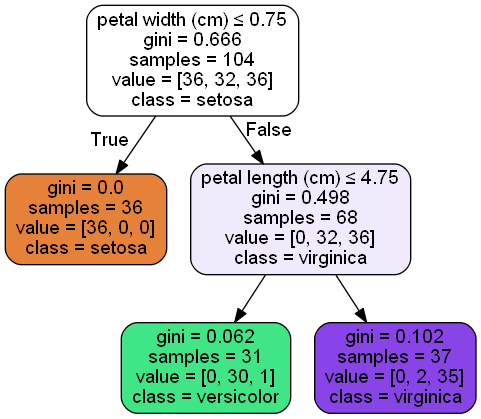

In [147]:
build_tree(model, ['setosa','versicolor','virginica'])

### Test the model

### Training data

In [148]:
y_predict_train = model.predict(X_train)
accuracy_score(y_train,y_predict_train)

0.9711538461538461

In [149]:
pd.crosstab(y_train,y_predict_train)

col_0,0,1,2
target,,,
0,36,0,0
1,0,30,2
2,0,1,35


### Test data

In [150]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9111111111111111

In [151]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2
target,,,
0,14,0,0
1,0,14,4
2,0,0,13


In [152]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.78      0.88        18
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



In [153]:
precision_score(y_test, y_predict, average='weighted')

0.9320261437908496

### ROC AUC score

In [154]:
y_predict_probability = model.predict_proba(X_test)
print(roc_auc_score(np.array(y_test), np.array(y_predict_probability), multi_class='ovr')) # Ove vs Rest
print(roc_auc_score(np.array(y_test), np.array(y_predict_probability), multi_class='ovo')) # One vs One

0.9613340192043895
0.9629629629629629


### Feature Importance

In [136]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])

,Importance
sepal length (cm),0.000000
sepal width (cm),0.000000
petal length (cm),0.443433
petal width (cm),0.556567
